# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic 

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'

titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index 

In [3]:
titanic = titanic.set_index('PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

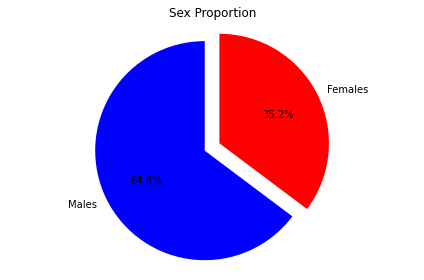

In [4]:
# 答案：
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue', 'red'],
    
    # with one slide exploaded out
    explode = (0.15, 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    
)

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title('Sex Proportion')

# View the plot
plt.tight_layout()
plt.show()

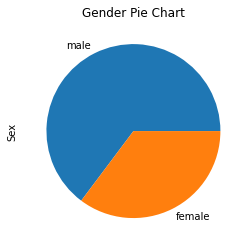

In [5]:
# 自己的解法1:
titanic['Sex'].value_counts().plot(kind='pie', title='Gender Pie Chart')
plt.show()

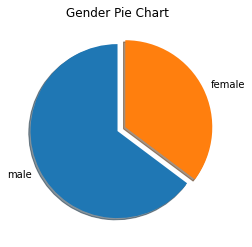

In [6]:
# 自己的解法2:
gender_count = titanic['Sex'].value_counts()
plt.pie(gender_count, labels=gender_count.index, startangle=90, explode=[0, 0.1], shadow=True)
plt.title('Gender Pie Chart')
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

In [7]:
print( titanic.dtypes )
titanic.Sex.replace(['male', 'female'], [1, 0])

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int64

注意以下用 pandas 的 `map` 函数！

In [8]:
titanic.Sex.map({'male': 'red', 'female': 'green'})

PassengerId
1        red
2      green
3      green
4      green
5        red
       ...  
887      red
888    green
889    green
890      red
891      red
Name: Sex, Length: 891, dtype: object

/Users/shihaosun/anaconda3/lib/python3.7/site-packages/matplotlib/collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


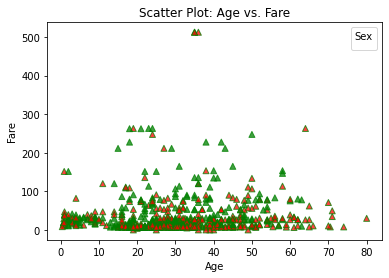

In [9]:
# 自己的解法2：
ax = plt.scatter(titanic.Age, titanic.Fare, 
            c=titanic.Sex.map({'male': 'red', 'female': 'green'}),     # 与上面比，只有这一行不同
            edgecolors='green',
            alpha=0.75,
            marker = '^')
plt.title('Scatter Plot: Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(*ax.legend_elements(), loc="upper right", title="Sex")
plt.show()

<string>:6: UserWarning: Warning: converting a masked element to nan.
/Users/shihaosun/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/Users/shihaosun/anaconda3/lib/python3.7/site-packages/matplotlib/ticker.py:548: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


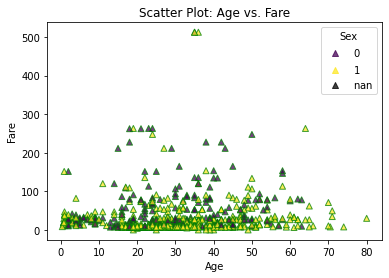

In [10]:
# 自己的解法2：
ax = plt.scatter(titanic.Age, titanic.Fare, 
            c=titanic.Sex.replace(['male', 'female'], [1, 0]), 
            edgecolors='green',
            alpha=0.75,
            marker = '^')
plt.title('Scatter Plot: Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(*ax.legend_elements(), loc="upper right", title="Sex")
plt.show()

(-5.0, 85.0)

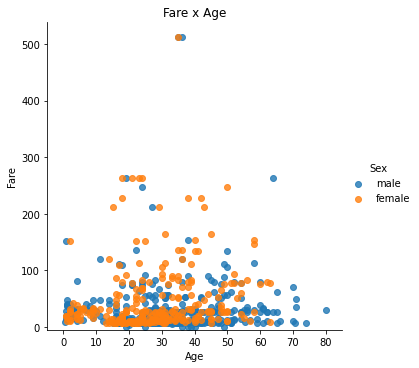

In [11]:
# 答案：
# creaates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg = False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak if
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

(-10.0, 83.979)

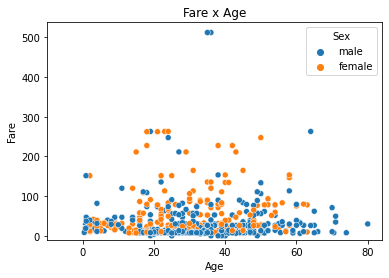

In [12]:
# 自己加/试（与上面对比）
ax = sns.scatterplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex')

ax.set(title = 'Fare x Age')

ax.set_ylim(-10,)
ax.set_xlim(-10,)

### Step 7. How many people survived?

In [13]:
titanic.Survived.sum()

342

### Step 8. Create a histogram with the Fare payed

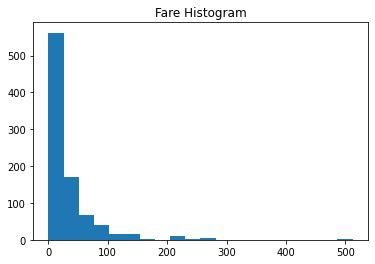

In [14]:
# 自己的解法1：
plt.hist(titanic.Fare, bins=20)
plt.title('Fare Histogram')
plt.show()

<AxesSubplot:ylabel='Frequency'>

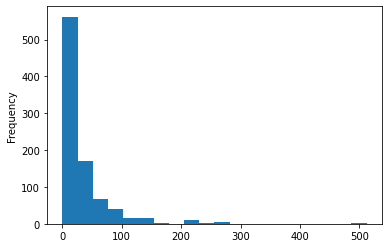

In [15]:
# 自己的解法2:
titanic.Fare.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

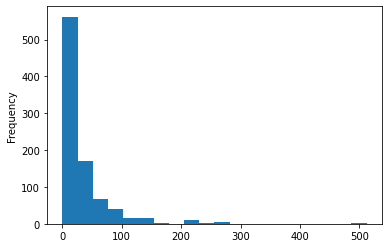

In [16]:
# 自己的解法3:
titanic.Fare.plot(kind='hist', bins=20)

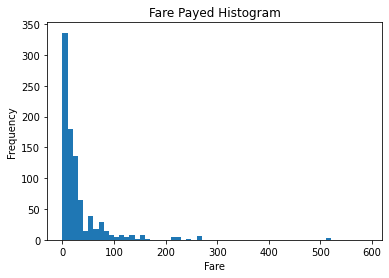

In [17]:
# 答案：
# sort the values from the top to the least value and slice the first 5 items
df = titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins=binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histogram')

# show the plot
plt.show()

/Users/shihaosun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


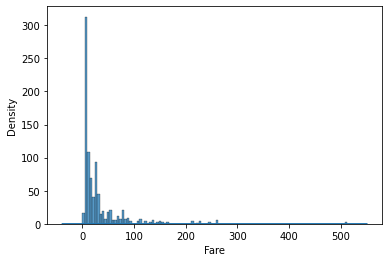

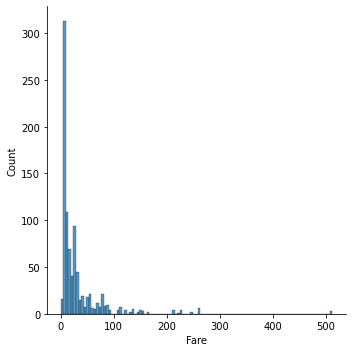

In [18]:
sns.distplot(titanic.Fare)
sns.histplot(titanic.Fare)
sns.displot(titanic.Fare)

### BONUS: Create your own question and answer it.